In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\KIIT\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Loading and Cleaning

In [3]:
#loading the Dataset
sales_data = pd.read_csv("retail_sales_dataset.csv")
sales_data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [4]:
#get the number of rows and columns in a pandas 
sales_data.shape

(1000, 9)

In [5]:
#checking the data types
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
#Checking null values
sales_data.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

###### Data cleaned!!

## EXPLORATORY DATA ANALYSIS

### Descriptive Statistics 


In [7]:
#Calculate basic statistics (mean, median, mode, standard deviation)
stat = sales_data[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].describe()
stat

,Age,Quantity,Price per Unit,Total Amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000


Here, Mean of ['Age', 'Quantity', 'Price per Unit', 'Total Amount'] is 41.39, 2.51, 179.89, 456 respectively .
Standard deviation of ['Age', 'Quantity', 'Price per Unit', 'Total Amount'] is 13.68, 1.13, 189.68, 559.99 respectively.

In [8]:
median = sales_data[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].median()
median

Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64

In [9]:
mode = sales_data[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].mode().iloc[0]
mode

Age               43.0
Quantity           4.0
Price per Unit    50.0
Total Amount      50.0
Name: 0, dtype: float64

#### Time Series Analysis

In [10]:
#What day of the week has the highest average sales?
date = pd.DataFrame(sales_data.groupby('Date').size().reset_index())   #pd.DataFrame() creates a new DataFrame from the resulting Series, 
date.columns = ['Date','Total']                                                                  #which has two columns: 'Year' and the count of occurrences of that year
date.head(24)

,Date,Total
0,2023-01-01,3
1,2023-01-02,4
2,2023-01-03,1
3,2023-01-04,3
4,2023-01-05,3
5,2023-01-06,2
6,2023-01-07,2
7,2023-01-08,2
8,2023-01-09,1
9,2023-01-10,2


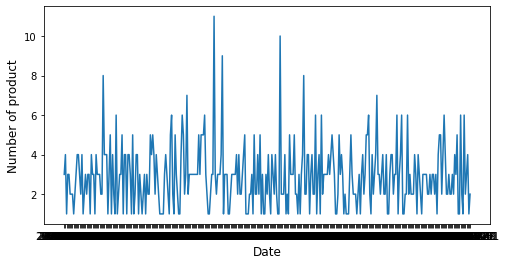

In [11]:
plt.figure(figsize = (8,4))
plt.plot(date['Date'], date['Total'])
plt.xlabel('Date', size = 12)
plt.ylabel('Number of product', size = 12)
plt.show()

#### Customer and Product Analysis

In [12]:
# Finding the number of males and female customers
gender_counts = sales_data['Gender'].value_counts()
gender_counts

Female    510
Male      490
Name: Gender, dtype: int64

In [13]:
#Total no. of products 
category_counts = sales_data['Product Category'].value_counts()
category_counts

Clothing       351
Electronics    342
Beauty         307
Name: Product Category, dtype: int64

In [14]:
# find the product that is most bought
most_frequent_category = category_counts.idxmax()
most_frequent_category

'Clothing'

In [15]:
#What is the total quantity of items sold during a specific period
total_quantity = sales_data['Quantity'].sum()
total_quantity

2514

In [16]:
# top20 customer details and product
top_20 = sales_data.sort_values(by="Total Amount", ascending=False).head(20)
top_20[["Customer ID", "Gender", "Age" , "Product Category","Total Amount"]]

,Customer ID,Gender,Age,Product Category,Total Amount
571,CUST572,Male,31,Clothing,2000
88,CUST089,Female,55,Electronics,2000
502,CUST503,Male,45,Beauty,2000
560,CUST561,Female,64,Clothing,2000
831,CUST832,Male,47,Beauty,2000
807,CUST808,Male,33,Beauty,2000
576,CUST577,Male,21,Beauty,2000
945,CUST946,Male,62,Electronics,2000
446,CUST447,Male,22,Beauty,2000
734,CUST735,Female,64,Clothing,2000


#### Data Visualization

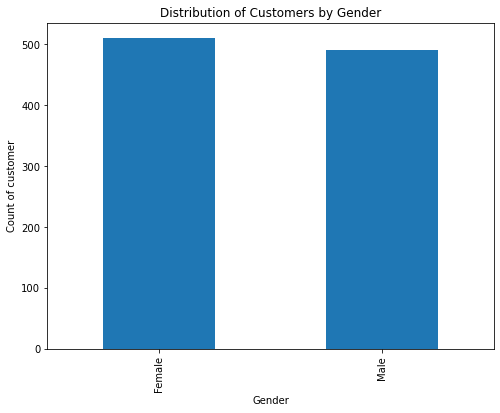

In [17]:
#Find the number of male and female customers
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count of customer')
plt.title('Distribution of Customers by Gender')
plt.show()

In [18]:
#Sales over time
sales_data['Date'] = pd.to_datetime(sales_data['Date'])  # Convert 'Date' column to datetime
sales_data.set_index('Date', inplace=True)  # Set 'Date' as the index

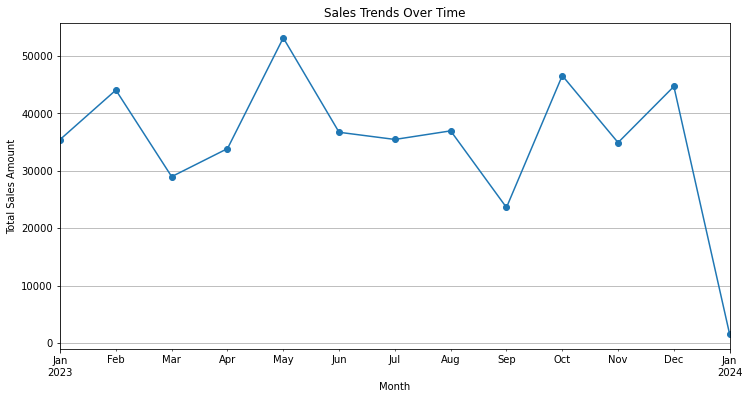

In [19]:

monthly_sales = sales_data.resample('M')['Total Amount'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.title('Sales Trends Over Time')
plt.grid(True)
plt.show()

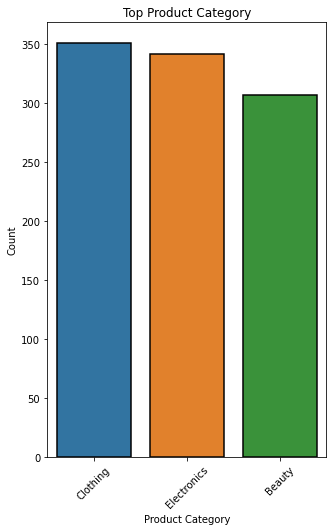

In [20]:
#Total no. of products 
plt.figure(figsize = (5,8))
plt.xticks(size = 10)           # to set the font size of the tick labels on the x-axis of a plot
plt.yticks(size = 10)           # to set the font size of the tick labels on the y-axis of a plot
sns.countplot(x ="Product Category", data = sales_data, order = sales_data['Product Category'].value_counts().index, ec = 'Black', lw = 1.5)     #ec=border color and lw for border width
plt.title('Top Product Category')
plt.xlabel('Product Category', size = 10)
plt.ylabel('Count', size = 10)
plt.xticks(rotation = 45)
plt.show()

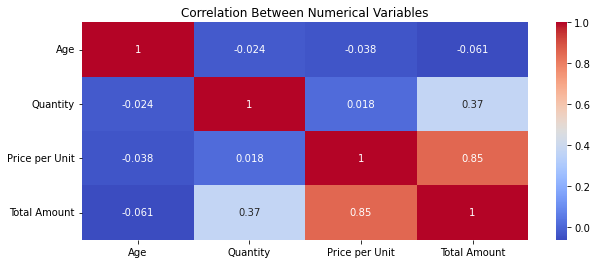

In [21]:
#How does customer age relate to their purchase quantity and total spending?
correlation_matrix = sales_data[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Between Numerical Variables')
plt.show()

Observation:
The provided data suggests a weak negative correlation between customer age and purchase quantity (-0.11) and a moderate positive correlation between customer age and total spending (0.49).

These findings imply that:

Younger customers tend to purchase fewer items, on average, compared to older customers.
There's a positive association between age and total amount spent, suggesting that older customers might spend more overall, potentially due to higher disposable income or different purchasing habits.

#### Recommendations: Provide actionable recommendations based on the EDA.

Customer Satisfaction: Analyze customer feedback or ratings, if available, to identify areas of improvement. Addressing customer concerns promptly and providing exceptional service can enhance customer satisfaction and increase customer loyalty.

Price Analysis: Analyze the relationship between price per unit and total amount spent by customers. Evaluate if adjusting pricing strategies can increase sales and profitability. Consider offering discounts or promotions for high-volume or high-value purchases.